In [5]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from nengo.utils.matplotlib import rasterplot

%matplotlib inline

In [6]:
af = scipy.io.loadmat("c1p8.mat")
stim = af["stim"]
rho = af["rho"]

In [47]:
from scipy.signal import lti

def synthetic_neuron(drive):
    """
    Simulates a mock neuron with a time step of 1ms.
    Arguments:
    drive - input to the neuron (expect zero mean; SD=1)
    Returns:
    rho - response function (0=non-spike and 1=spike at each time step)
    """
    dt = .001
    T = dt*len(drive)
    time = np.arange(0, T, dt)
    lagSteps = int(.02/dt)
    drive = np.concatenate((np.zeros(lagSteps), drive[lagSteps:]))
    system = scipy.signal.lti([1], [.03**2, 2*.03, 1])
    _, L, _ = scipy.signal.lsim(system, drive[:,np.newaxis], time)
    rate = np.divide(30, 1 + np.exp(50*(.05-L)))
    spikeProb = rate*dt
    return np.random.rand(len(spikeProb)) < spikeProb

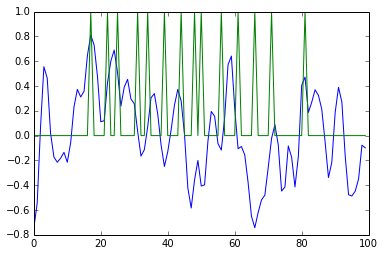

In [29]:
plt.plot(stim[:100]/150)
plt.plot(rho[:100])

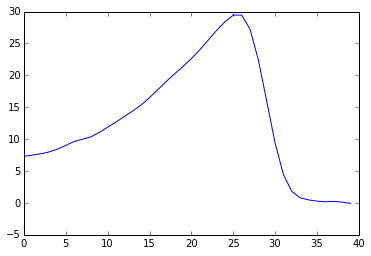

In [50]:
# get spikes
def stavg(stim, resp, win=40):
    spikes = np.where(resp == 1)[0]
    spikes = spikes[spikes >= 40]
    inputs = np.zeros((spikes.shape[0], win))

    # iterate through the spiking data
    for s_i in xrange(spikes.shape[0]):
        s_t = spikes[s_i]
        inputs[s_i] = stim[s_t-win:s_t].reshape((40,))

    # average it   
    return np.average(inputs, axis=0)

in_avg = stavg(stim, rho)
plt.plot(in_avg)

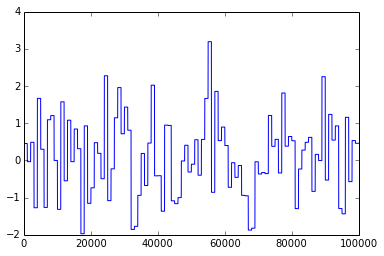

In [42]:
white_vals = np.random.normal(0, 1, size=100)
white_noise = np.zeros(100*1000)

# how do I this without a for-loop?
for w_i in xrange(white_vals.shape[0]):
    white_noise[w_i*1000:(w_i+1)*1000] = white_vals[w_i]
plt.plot(white_noise)

In [44]:
len(white_noise)

100000

In [48]:
n_res = synthetic_neuron(white_noise)

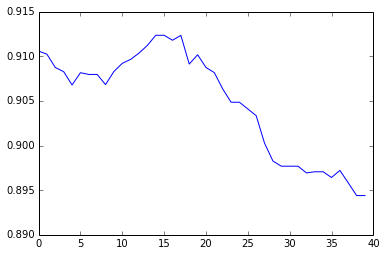

In [51]:
in_avg = stavg(white_noise, n_res)
plt.plot(in_avg)

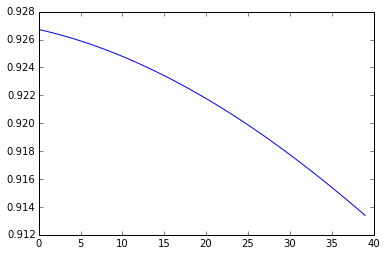

In [53]:
from scipy.ndimage.filters import gaussian_filter1d

col_noise = gaussian_filter1d(white_noise, sigma=20)
n_res = synthetic_neuron(col_noise)
in_avg = stavg(col_noise, n_res)
plt.plot(in_avg)

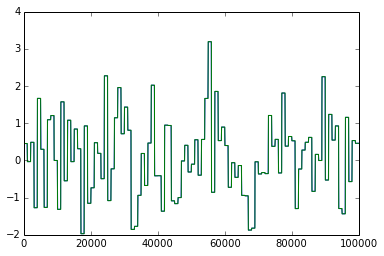

In [56]:
plt.plot(gaussian_filter1d(white_noise, sigma=20))
plt.plot(white_noise)